<a href="https://colab.research.google.com/github/HungPham2002/Visual-Prompting-with_Landing.AI/blob/main/Visual_Prompting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install python-dotenv
!pip install landingai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 66.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 50.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 53.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 276.6/276.6 kB 30.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 66.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.7/288.7 kB 30.5 MB/s eta 0:00:00
  Attempting uninstall: pydantic
    Found existing installation: pydantic 2.6.4
    Uninstalling pydantic-2.6.4:
      Successfully uninstalled pydantic-2.6.4
  Attempting uninstall: pandas
    Found existing installation: pandas 2.0.3
    Uninstalling pandas-2.0.3:
      Successfully uninstalled pandas-2.0.3
ERROR: pip's dependency resolver does not cur

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Test Image

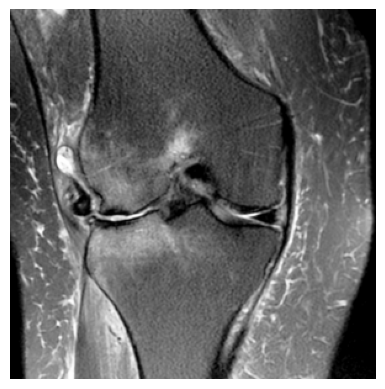

In [ ]:
image_path = '/content/test2.png'
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(image)

# Call the Visual Prompting API

In [ ]:
from PIL import Image
from landingai.predict import Predictor

endpoint_id = "65bb197d-11b3-4927-9b34-a32561d04d82"
api_key = "land_sk_jP1pPSXQZseaTPRhdivUusAgmyWqJG8alIrJ22Om0skvAyShav"

image = Image.open(image_path)

predictor = Predictor(endpoint_id, api_key=api_key)
predictions = predictor.predict(image)

In [ ]:
predictions

[SegmentationPrediction(score=1.0, label_name='Femur', label_index=1, id='662425d4-0d69-349a-6c9f-e73be7f1e00f', encoded_mask='68Z16N20Z15N12Z19N1Z2N35Z2N175Z16N20Z15N12Z19N1Z2N212Z16N19Z16N11Z22N200Z1N12Z16N19Z16N8Z25N199Z2N12Z15N20Z16N6Z27N199Z2N8Z1N3Z15N19Z17N5Z29N199Z1N8Z2N2Z15N17Z53N208Z3N1Z15N12Z58N207Z20N12Z59N206Z20N13Z58N205Z21N13Z59N204Z21N14Z58N204Z22N16Z12N1Z43N203Z22N17Z10N3Z42N203Z23N17Z9N5Z41N201Z24N17Z10N4Z42N200Z24N16Z12N3Z42N201Z24N14Z14N2Z43N200Z5N3Z18N11Z60N201Z4N3Z18N11Z61N200Z4N3Z19N9Z19N1Z43N198Z4N4Z20N8Z19N1Z44N197Z4N4Z20N9Z18N1Z44N196Z6N3Z20N9Z18N1Z44N196Z6N1Z21N11Z16N2Z45N195Z27N12Z14N4Z45N194Z29N11Z13N6Z44N193Z32N9Z10N10Z44N191Z34N9Z8N11Z45N190Z35N9Z7N12Z46N187Z37N8Z6N13Z5N4Z37N187Z39N6Z6N13Z4N5Z38N185Z40N6Z7N12Z3N7Z37N184Z42N3Z10N11Z3N7Z39N181Z56N11Z3N8Z39N181Z57N5Z8N7Z40N182Z56N4Z11N4Z40N183Z56N3Z18N1Z37N182Z77N1Z39N179Z119N177Z120N176Z121N175Z124N172Z125N171Z15N1Z112N171Z10N5Z112N172Z7N6Z112N129Z5N39Z6N6Z113N129Z4N40Z4N7Z113N130Z3N40Z4N6Z114N130Z4N40Z3N6Z1

# Display the predicion

In [ ]:
import numpy as np
import re

def decode_bitmap_rle(bitmap, encoding_map):
  flat_mask = np.array([])
  bitmap_list = re.split("(Z|N)", bitmap)
  for num, map_letter in zip(*[iter(bitmap_list)] * 2):
    map_number = encoding_map[map_letter]
    flat_mask = np.append(flat_mask, [int(map_number)] * int(num))
  return flat_mask

def get_array_from_response(predictions):
  # predictions = response["predictions"]
  height, width = predictions[0].mask_shape
  class_mask_femur = np.zeros((height, width), dtype=np.int64)
  class_mask_tabia = np.zeros((height, width), dtype=np.int64)
  class_mask_background = np.zeros((height, width), dtype=np.int64)
  index = 0
  for bitmap_info in predictions:
    encoding_map = bitmap_info.encoding_map
    label_index = bitmap_info.label_index
    rle = bitmap_info.encoded_mask
    flat_binary_mask = decode_bitmap_rle(rle, encoding_map).astype(bool)
    binary_mask = flat_binary_mask.reshape((height, width))
    if index == 0:
      class_mask_femur += binary_mask * label_index
    elif index == 1:
      class_mask_tabia += binary_mask * label_index
    elif index == 2:
      class_mask_background += binary_mask * label_index
    index += 1
  return class_mask_femur, class_mask_tabia, class_mask_background

prediction_femur, prediction_tabia, prediction_bg = get_array_from_response(predictions)
print(prediction_femur.shape, prediction_tabia.shape, prediction_bg.shape)
np.unique(prediction_femur), np.unique(prediction_tabia), np.unique(prediction_bg)

(300, 297) (300, 297) (300, 297)


(array([0, 1]), array([0, 2]), array([0, 3]))

In [ ]:
prediction = np.maximum.reduce([prediction_femur, prediction_tabia, prediction_bg])
print(prediction.shape)
print(np.unique(prediction))

(300, 297)
[1 2 3]


In [ ]:
PALETTE = [
    (0,0,0),
    (125,23,118),
    (255,255,0),
    (0,255,255),
    (255,0,255),
    (0,0,255),
    (255,143,32),
    (173,46,36),
    (71,4,0),
    (207,204,0),
    (167,209,65),
    (65,209,179),
    (112,233,255),
    (0,172,237),
]
def color_prediction(prediction, palette):
  prediction = prediction.astype(np.uint8)
  max_num_classes = np.max(prediction) + 1
  if max_num_classes > len(palette):
    print(
        f'Warningg: palette has {len(palette)} colors, but prediction can have up to {max_num_classes}'
    )
  if len(palette) < 256:
    padded_palette = palette + [(0,0,0)] * (256-len(palette))
  else:
    padded_palette = palette
  lut = np.array(padded_palette, np.uint8)
  viz_r = cv2.LUT(prediction, lut[:,0])
  viz_g = cv2.LUT(prediction, lut[:,1])
  viz_b = cv2.LUT(prediction, lut[:,2])
  viz_rgb = np.dstack([viz_r, viz_g, viz_b])
  return viz_rgb

colored_prediction = color_prediction(prediction, PALETTE)

In [ ]:
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image.shape

(300, 297, 3)

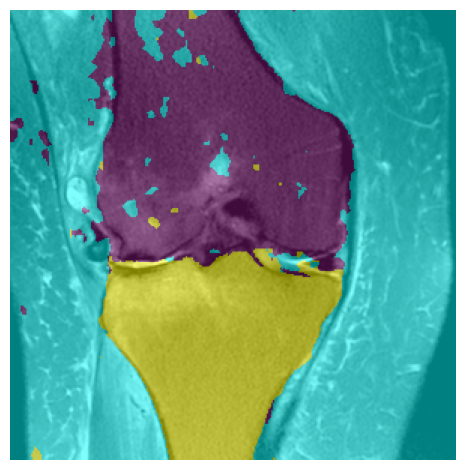

In [ ]:
import matplotlib.pyplot as plt

def visualize_image(img, fig, ax , show_colorbar=False, title=None, **kwargs):
  im = ax.imshow(img, **kwargs)
  ax.set_yticklabels([])
  ax.set_yticks([])
  ax.set_xticklabels([])
  ax.set_xticks([])
  ax.axis('off')
  if show_colorbar:
    plt.colorbar(im, orientation='vertical')
  if title is not None:
    plt.title(title)
  plt.tight_layout()

# image = np.array(image)
overlay = cv2.addWeighted(image, 0.5, colored_prediction, 0.5, 0)
fig, ax = plt.subplots()
visualize_image(overlay, fig, ax)
